# $$\textbf{Assigning loci to low-dimensional phenotypes using sparse regression} $$
The algorithm takes a matrix of additive effects, $F$, as input. Here $F \in \mathbb{R}^{E\times L}$, where $L$ is the
number of loci and $E$ is the number of environments. 


We'd like to split $F$ as $F = WM$, where $W \in \mathbb{R}^{E\times K}$, $M \in \mathbb{R}^{K\times L}$ and $K$ is the number
of lower-dimensional phenotypes. The cost function minimized here is 
\begin{align}
\mathcal{C}(W,M) = ||F - WM||^2_F + \lambda_1 \rho_1(W) + \lambda_2 \rho_2(M),
\end{align}
where $W$ and $M$ are regularized by $\rho_1$ and $\rho_2$ respectively. The regularizers have to be chosen
such that the symmetry $W \to WB, M \to B^{-1}M$ is broken, which will otherwise lead to multiple solutions. 
To optimize for $W$ and $M$, we 
use an alternating minimization algorithm, where we 1) optimize $W$  fixing $M$, 2) optimize $M$
fixing $W$, 3) repeat 1 and 2 until convergence. For each step, we use standard linear regression methods from SciPy.

# $$\textbf{Application on synthetic data} $$

The additive effects matrix, $F$, is computed from a generative model of $W$ and $M$. The structure of $W$ depends on the relationship between environments measured. We consider environments with specific structures, described further below. $M$ is chosen to be modular, with controllable modularity. Here the modularity is defined as the average number of modules each locus is involved in. More details will be posted. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import pickle
sys.path.insert(0, 'utils/')
from factorizer import *
import em
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
mode = "syn_hub"
directory = "pickled_factorizers_4_5_22"
fcts= pickle.load(open(f"{directory}/{mode}","rb"))
triples = pickle.load(open(f"{directory}/triples_{mode}","rb"))
fig_loc = "figures/syn_hub"

In [3]:
lamb2_range = 10**(np.linspace(np.log10(1e-3),np.log10(1.5),25))
lamb1_range = 10**(np.linspace(np.log10(1e-4),np.log10(1e-2),25))
lamb1_fixed = [1e-4]
lamb2_fixed = [1e-3]

In [4]:
svd_k = 6
m = 0.2
w = 2
mws = 0


m = 0.2, w = 2


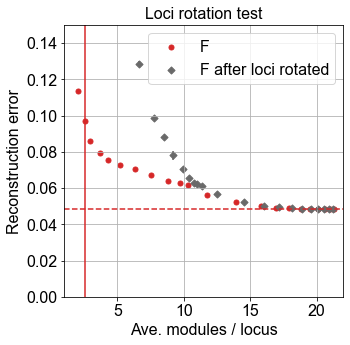

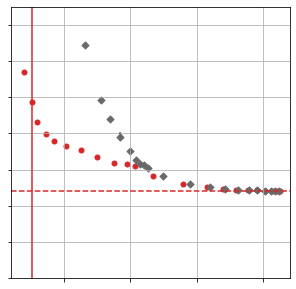

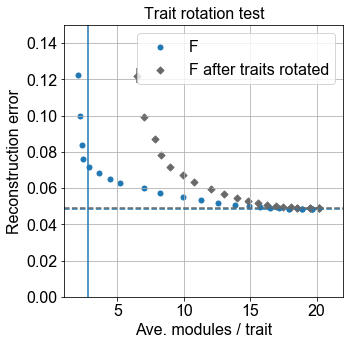

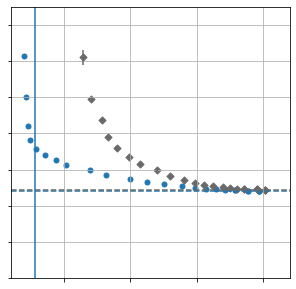

In [5]:
print(f"\nm = {m}, w = {w}")
name = (mode, m,w,mws)
fct = fcts[(name ,None,None)]
K = fct.computed_params(printout = False)[0][1]
fct_rots = [fcts[(name, None, i)] for i in [3,4,5]] 
rotate = "loci"
plot_rotation_test_w_error(fct, fct_rots, K, lamb1_fixed, lamb2_range, (1,K), (0,.15), rotate, fs = 16, svd_k=K, true_line = True, oc='tab:red', rotc='dimgrey')
plot_rotation_test_w_error(fct, fct_rots, K, lamb1_fixed, lamb2_range, (1,K), (0,.15), rotate, fs = 16, svd_k=K, true_line = True, oc='tab:red', rotc='dimgrey', labels= False, legend = False, save_name = f"{fig_loc}/loci_rot_test.svg")


fct_rots = [fcts[(name, i, None)] for i in [0,1,2]]
rotate = "env"
plot_rotation_test_w_error(fct, fct_rots, K, lamb1_range, lamb2_fixed, (1,K), (0,.15), rotate, fs = 16, svd_k=K, true_line = True, oc='tab:blue', rotc='dimgrey')
plot_rotation_test_w_error(fct, fct_rots, K, lamb1_range, lamb2_fixed, (1,K), (0,.15), rotate, fs = 16, svd_k=K, true_line = True, oc='tab:blue', rotc='dimgrey', labels= False, legend = False, save_name = f"{fig_loc}/trait_rot_test.svg")




m = 0.2, w = 2
K = 22


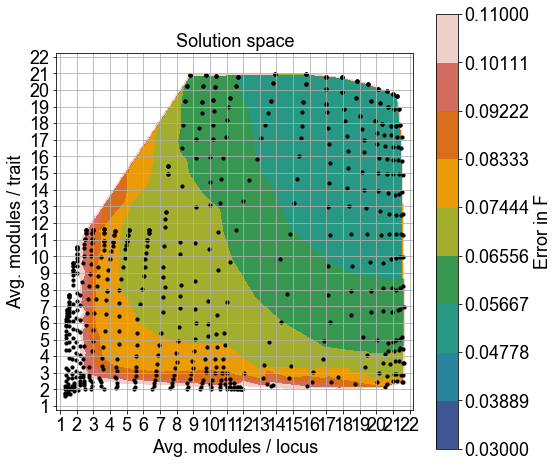

In [9]:
ve = .25
minx = 1-ve
maxx = 22+ve
miny = 1-ve
maxy = 22+ve
vmax = 0.11
vmin = 0.03

print(f"\nm = {m}, w = {w}")
name = (mode, m,w,mws)
fct = fcts[(name ,None,None)]
K = fct.computed_params(printout = False)[0][1]
print(f"K = {K}")
plot_solution_space(fct, K, lamb1_range, lamb2_range, minx, maxx, miny, maxy, vmax, vmin, scatter=True, scatter_restricted=False, restrict_in_range = False, k_labeled_points = None, circled_points = None, save_name = None)


m = 0.2, w = 2
K = 22
('reg', 22, (0.0032, 0.1777), (0, 0)) 3.533678756476684 3.42 12 0.0856967247978611
('reg', 22, (0.0068, 0.0014), (0, 0)) 20.505 2.12 21 0.08304617108920566


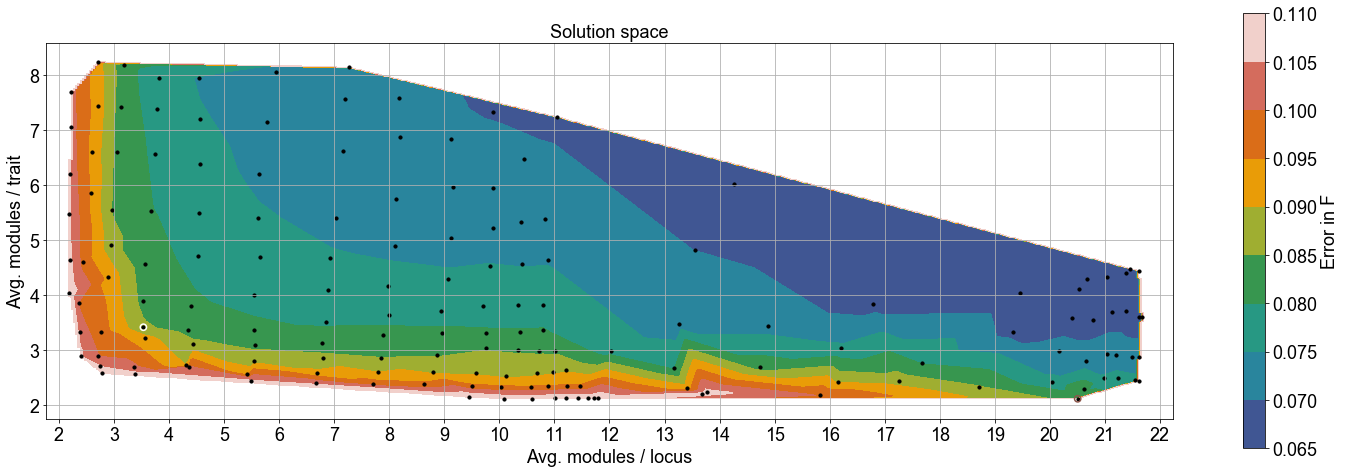

('reg', 22, (0.0032, 0.1777), (0, 0)) 3.533678756476684 3.42 12 0.0856967247978611
('reg', 22, (0.0068, 0.0014), (0, 0)) 20.505 2.12 21 0.08304617108920566


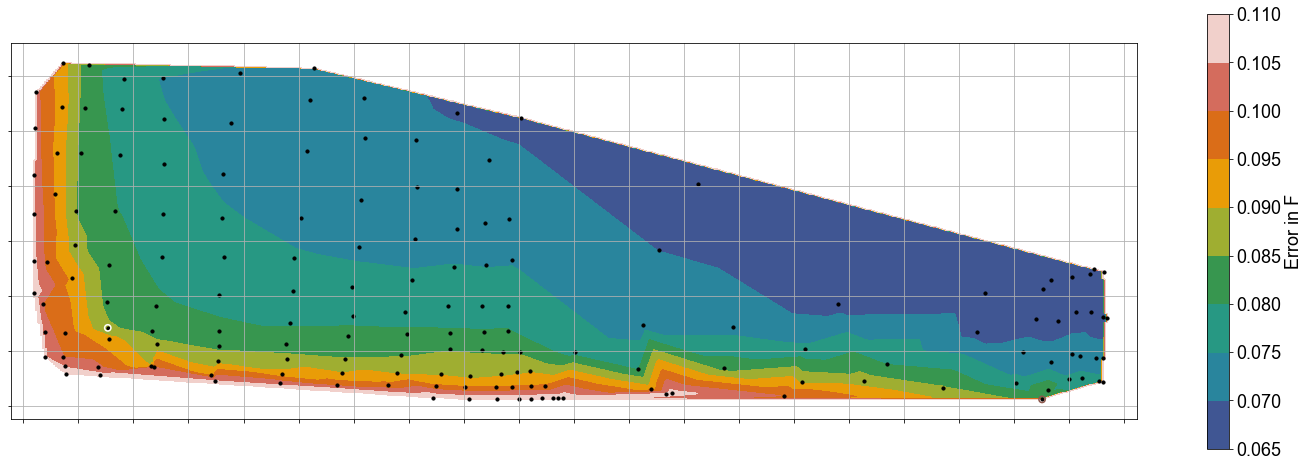

In [6]:
ve = .25
minx = 2-ve
maxx = 22+ve
miny = 2-ve
maxy = 8+ve
vmax = 0.11
vmin = 0.065
CP = [(3.5,3.5),(20.5,2.1)]

print(f"\nm = {m}, w = {w}")
name = (mode, m,w,mws)
fct = fcts[(name ,None,None)]
K = fct.computed_params(printout = False)[0][1]
print(f"K = {K}")
plot_solution_space(fct, K, lamb1_range, lamb2_range, minx, maxx, miny, maxy, vmax, vmin, scatter=True, scatter_restricted=True, restrict_in_range = True, k_labeled_points = None, circled_points = CP, cp_colors = ['white','tab:brown'])
plot_solution_space(fct, K, lamb1_range, lamb2_range, minx, maxx, miny, maxy, vmax, vmin, scatter=True, scatter_restricted=True, restrict_in_range = True, k_labeled_points = None, circled_points = CP, cp_colors = ['white','tab:brown'], labels = False, save_name = f"{fig_loc}/solution_space.svg")

(3.5, 3.5)
('syn_hub', 0.2, 2, 0)
Our Reconstruction error: 0.086
SVD Reconstruction error: 0.048
Our M err: 0.015
SVD M err: 0.822
num dropped envs: 0 
num true 0 envs: 0 
Our W cos err: 0.011
SVD W cos err: 0.851


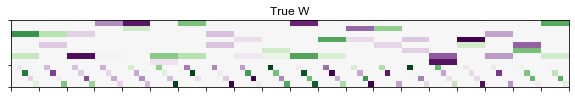

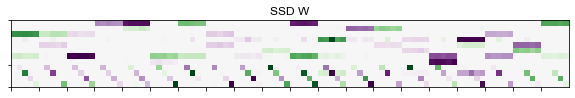

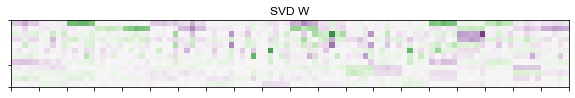

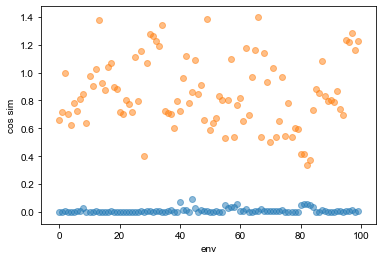

In [15]:
name = ("syn_hub", .2, 2, 0)
maxy = 22+ve
fct = fcts[(name ,None,None)]
K = fct.computed_params(printout = False)[0][1]
for p in CP[:1]:
    print(p)   
    compare_Ws(fcts, name, p, vs=None, hubticks=True, save_name = f"{fig_loc}/W.svg")


(100, 22)


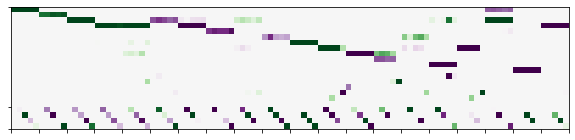

In [17]:
pt = CP[1]
fct = fcts[(name ,None,None)]
k = fct.computed_params(printout = False)[0][1]
p = fct.find_key(pt[0], pt[1])
print(fct.W_preds[p].shape)
keep = list(np.where(np.abs(fct.M_preds[p].sum(axis = -1))>0)[0])


our_W = fct.W_preds[p]
v = 10*np.mean(np.abs(our_W))
fig, axis = plt.subplots(1,1,figsize = (10,4))
oWT = our_W.T
oWT = our_W.T[[7,16,0,1,18,11,12,15,9,21,13,8,10,14,17,2,3,20,5,19,6,4],:]

oWT[-2:]= oWT[-2:]*-1


axis.imshow(oWT,cmap = 'PRGn', vmin = -v,vmax =v )

axis.set_xticks(np.arange(-.5,our_W.T.shape[1]+1,5))
axis.set_yticks([-.5,our_W.T.shape[0]-4.5,our_W.T.shape[0]-.5])

axis.set_xticklabels([])
axis.set_yticklabels([])
fig.savefig(f"{fig_loc}/W_ssd_alt.svg", bbox_inches='tight')

plt.show()
    